In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1.8)

import plotly.offline as py
from plotly import tools
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import missingno as msno
import random

from plotly import tools

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

df_app = pd.read_csv('./app-store-apple-data-set-10k-apps/AppleStore.csv')
df_app.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [2]:
df_app.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

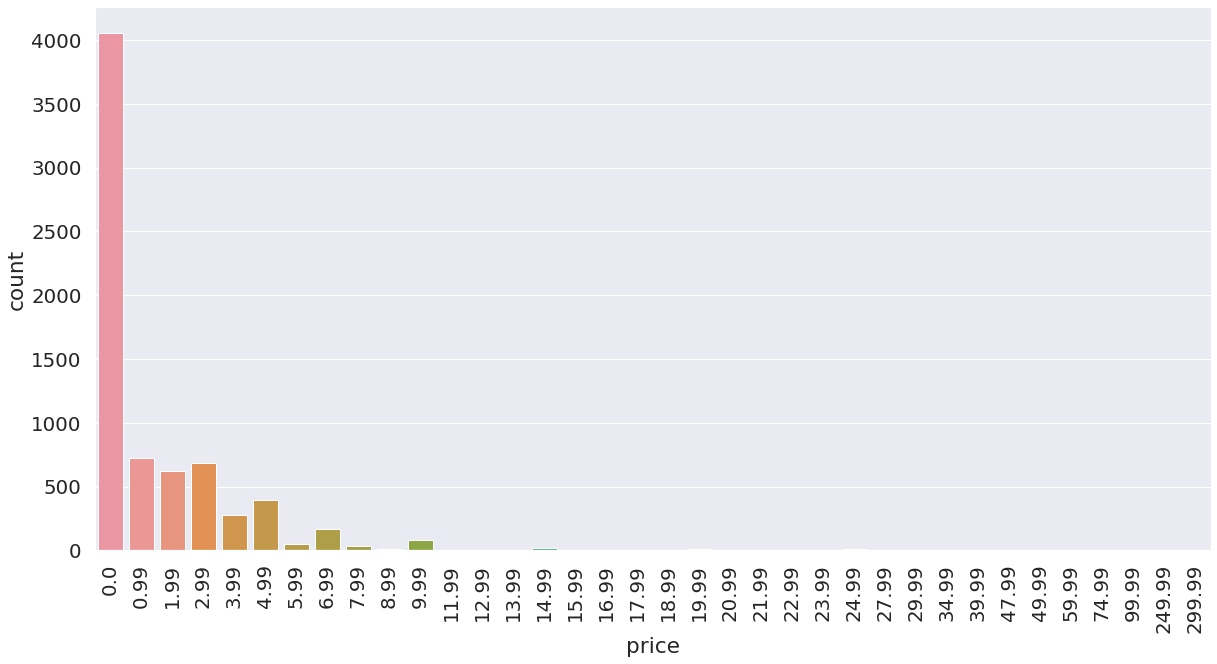

In [3]:
plt.subplots(figsize =(20,10))
sns.countplot(df_app.price)
plt.xticks(rotation =90 )

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

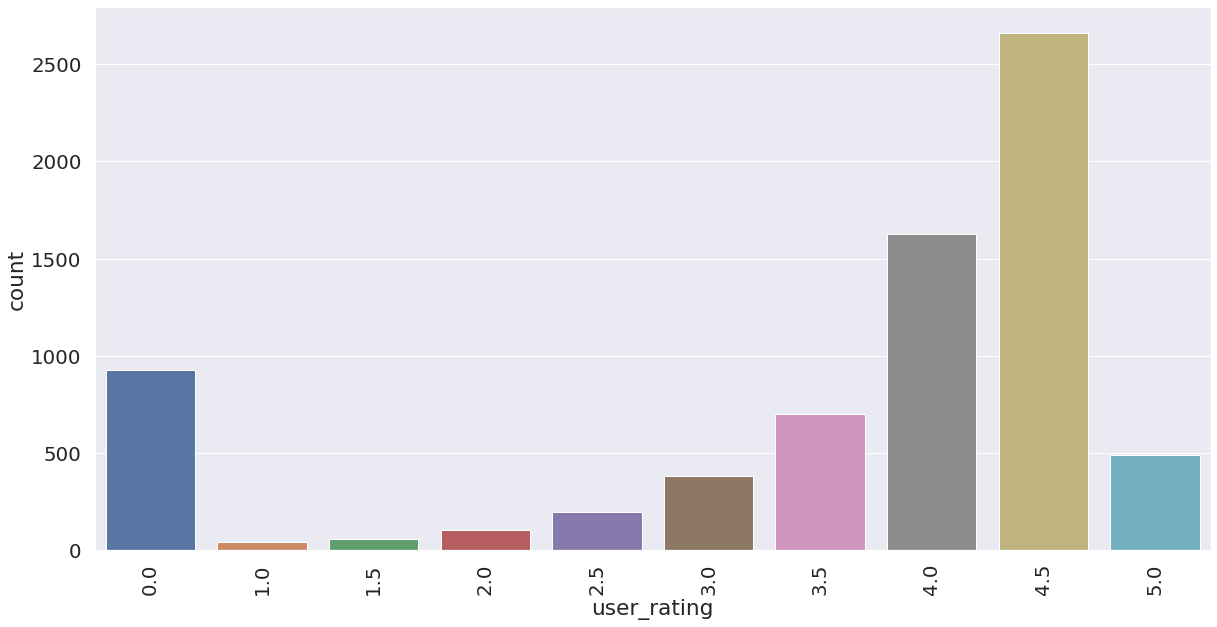

In [4]:
plt.subplots(figsize =(20,10))
sns.countplot(df_app.user_rating)
plt.xticks(rotation =90 )

In [5]:
df_app.isnull().sum()

Unnamed: 0          0
id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [6]:
df_app.corr()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
Unnamed: 0,1.000000,0.910714,0.041277,-0.074326,-0.168640,-0.064717,-0.204867,-0.127580,0.024648,0.014589,-0.148487,0.000501
id,0.910714,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932,0.017743
size_bytes,0.041277,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,-0.074326,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,-0.168640,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,-0.064717,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,-0.204867,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,-0.127580,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,0.024648,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.014589,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901


In [7]:
df_app.corrwith(df_app.price)

Unnamed: 0         -0.074326
id                 -0.075247
size_bytes          0.182392
price               1.000000
rating_count_tot   -0.039044
rating_count_ver   -0.018012
user_rating         0.046601
user_rating_ver     0.025173
sup_devices.num    -0.115361
ipadSc_urls.num     0.066100
lang.num           -0.006713
vpp_lic            -0.029942
dtype: float64

In [8]:
df_app.size_bytes.dtypes
df_app.rename(columns={"ipadSc_urls.num":"ipad_urls"} , inplace =True)

In [9]:
df_application = pd.DataFrame()

In [10]:
df_application['size_bytes'] = df_app.size_bytes
df_application['prime_genre'] = df_app.prime_genre
df_application['price'] = df_app.price
df_application['lang_num'] = df_app['lang.num']
df_application['sup_devices.num'] = df_app['sup_devices.num']
df_application['rating_count_tot'] = df_app['rating_count_tot']
df_application['rating'] = df_app.user_rating
df_application

,size_bytes,prime_genre,price,lang_num,sup_devices.num,rating_count_tot,rating
0,100788224,Games,3.99,10,38,21292,4.0
1,158578688,Productivity,0.00,23,37,161065,4.0
2,100524032,Weather,0.00,3,37,188583,3.5
3,128512000,Shopping,0.00,9,37,262241,4.0
4,92774400,Reference,0.00,45,37,985920,4.5
5,10485713,Games,0.99,1,47,8253,4.0
6,227795968,Finance,0.00,19,37,119487,4.0
7,130242560,Music,0.00,1,37,1126879,4.0
8,49250304,Utilities,9.99,1,37,1117,4.5
9,70023168,Games,3.99,10,38,7885,4.0


In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_application.prime_genre = le.fit_transform(df_app.prime_genre)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
X = df_application.iloc[:,:-1]
y = df_application.iloc[:, -1]
y = y.astype(int)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
random_for = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
random_for.fit(X_train,y_train)
score =random_for.score(X_test,y_test)
print(score)

pred = random_for.predict([[100788224, 10, 3.99, 10, 38, 21292]])
pred2 = random_for.predict([[100524032, 16, 0, 3, 37, 188583]])
pred3 = random_for.predict([[537462784, 10, 0.99, 1, 38, 0]])

print(pred)
print(pred2)
print(pred3[0])

0.7293771043771043
[4]
[4]
0


In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict([[100788224, 10, 3.99, 10, 38, 21292]])
pred2 = gnb.predict([[100524032, 16, 0, 3, 37, 188583]])

print(pred)
print(pred2)

[4]
[4]


In [17]:
gnb.score(X_test, y_test)

0.22853535353535354

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train) 
print(knn.score(X_test, y_test))
pred = knn.predict([[100788224, 10, 3.99, 10, 38, 21292]])
pred2 = knn.predict([[100524032, 16, 0, 3, 37, 188583]])

print(pred)
print(pred2)

0.5883838383838383
[4]
[4]


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
scores     

array([0.5815406 , 0.59333796, 0.5913829 , 0.5990271 , 0.59359777])

In [17]:
max(3,4)

4